# AUX_MRC_1B

> Abstract: Access to auxiliary MRC product

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

viresclient: 0.7.2
pandas     : 1.2.4
xarray     : 0.17.0
matplotlib : 3.4.1



In [2]:
from viresclient import AeolusRequest
import datetime as dt
import matplotlib.pyplot as plt

request = AeolusRequest()

## Product information

Description of product.

Documentation:
- https://earth.esa.int/eogateway/catalog/aeolus-preliminary-hlos-horizontal-line-of-sight-wind-observations-for-rayleigh-and-mie-receivers


In [3]:


request.set_collection('AUX_MRC_1B')

request.set_fields(fields=[
    "altitude",
    "satellite_range",
    "normalised_useful_signal",
    "mie_scattering_ratio",
    "lat_of_DEM_intersection",
    "lon_of_DEM_intersection",
    "time_freq_step",
    "frequency_offset",
    "frequency_valid",
    "measurement_response",
    "measurement_response_valid",
    "measurement_error_mie_response",
    "reference_pulse_response",
    "reference_pulse_response_valid",
    "reference_pulse_error_mie_response",
    "num_measurements_usable",
    "num_valid_measurements",
    "num_reference_pulses_usable",
    "num_mie_core_algo_fails_measurements",
    "num_ground_echoes_not_detected_measurements",
    "measurement_mean_sensitivity",
    "measurement_zero_frequency",
    "measurement_error_mie_response_std_dev",
    "measurement_offset_frequency",
    "reference_pulse_mean_sensitivity",
    "reference_pulse_zero_frequency",
    "reference_pulse_error_mie_response_std_dev",
    "reference_pulse_offset_frequency",
    "satisfied_min_valid_freq_steps_per_cal",
    "freq_offset_data_monotonic",
    "num_of_valid_frequency_steps",
    "measurement_mean_sensitivity_valid",
    "measurement_error_response_std_dev_valid",
    "measurement_zero_frequency_response_valid",
    "measurement_data_monotonic",
    "reference_pulse_mean_sensitivity_valid",
    "reference_pulse_error_response_std_dev_valid",
    "reference_pulse_zero_frequency_response_valid",
    "reference_pulse_data_monotonic",
    "mie_core_measurement_FWHM",
    "mie_core_measurement_amplitude",
    "mie_core_measurement_offset"
])

data = request.get_between(
    start_time="2020-02-24T18:15:22Z",
    end_time="2020-02-24T18:29:46Z",
    filetype="nc",
    asynchronous=False
)

ds = data.as_xarray()



      Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.156MB)

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.156MB)

DATA: <xarray.Dataset>
Dimensions:                                        (array_24: 24, array_25: 25, calibration: 1, frequency: 37)
Dimensions without coordinates: array_24, array_25, calibration, frequency
Data variables: (12/42)
    measurement_mean_sensitivity                   (calibration) float64 ...
    measurement_zero_frequency                     (calibration) float64 ...
    measurement_error_mie_response_std_dev         (calibration) float64 ...
    measurement_offset_frequency                   (calibration) float64 ...
    reference_pulse_mean_sensitivity               (calibration) float64 ...
    reference_pulse_zero_frequency                 (calibration) float64 ...
    ...                                             ...
    num_reference_pulses_usable                    (frequency) int32 ...
    num_mie_core_algo_fails_measurements           (frequency) int32 ...
    num_ground_echoes_not_detected_measurements    (frequency) int32 ...
    mie_core_measurement_FWHM 

AxesSubplot(0.125,0.808774;0.775x0.0712264)
AxesSubplot(0.125,0.723302;0.775x0.0712264)
AxesSubplot(0.125,0.63783;0.775x0.0712264)
AxesSubplot(0.125,0.552358;0.775x0.0712264)
AxesSubplot(0.125,0.466887;0.775x0.0712264)
AxesSubplot(0.125,0.381415;0.775x0.0712264)
AxesSubplot(0.125,0.295943;0.775x0.0712264)
AxesSubplot(0.125,0.210472;0.775x0.0712264)
AxesSubplot(0.125,0.125;0.775x0.0712264)


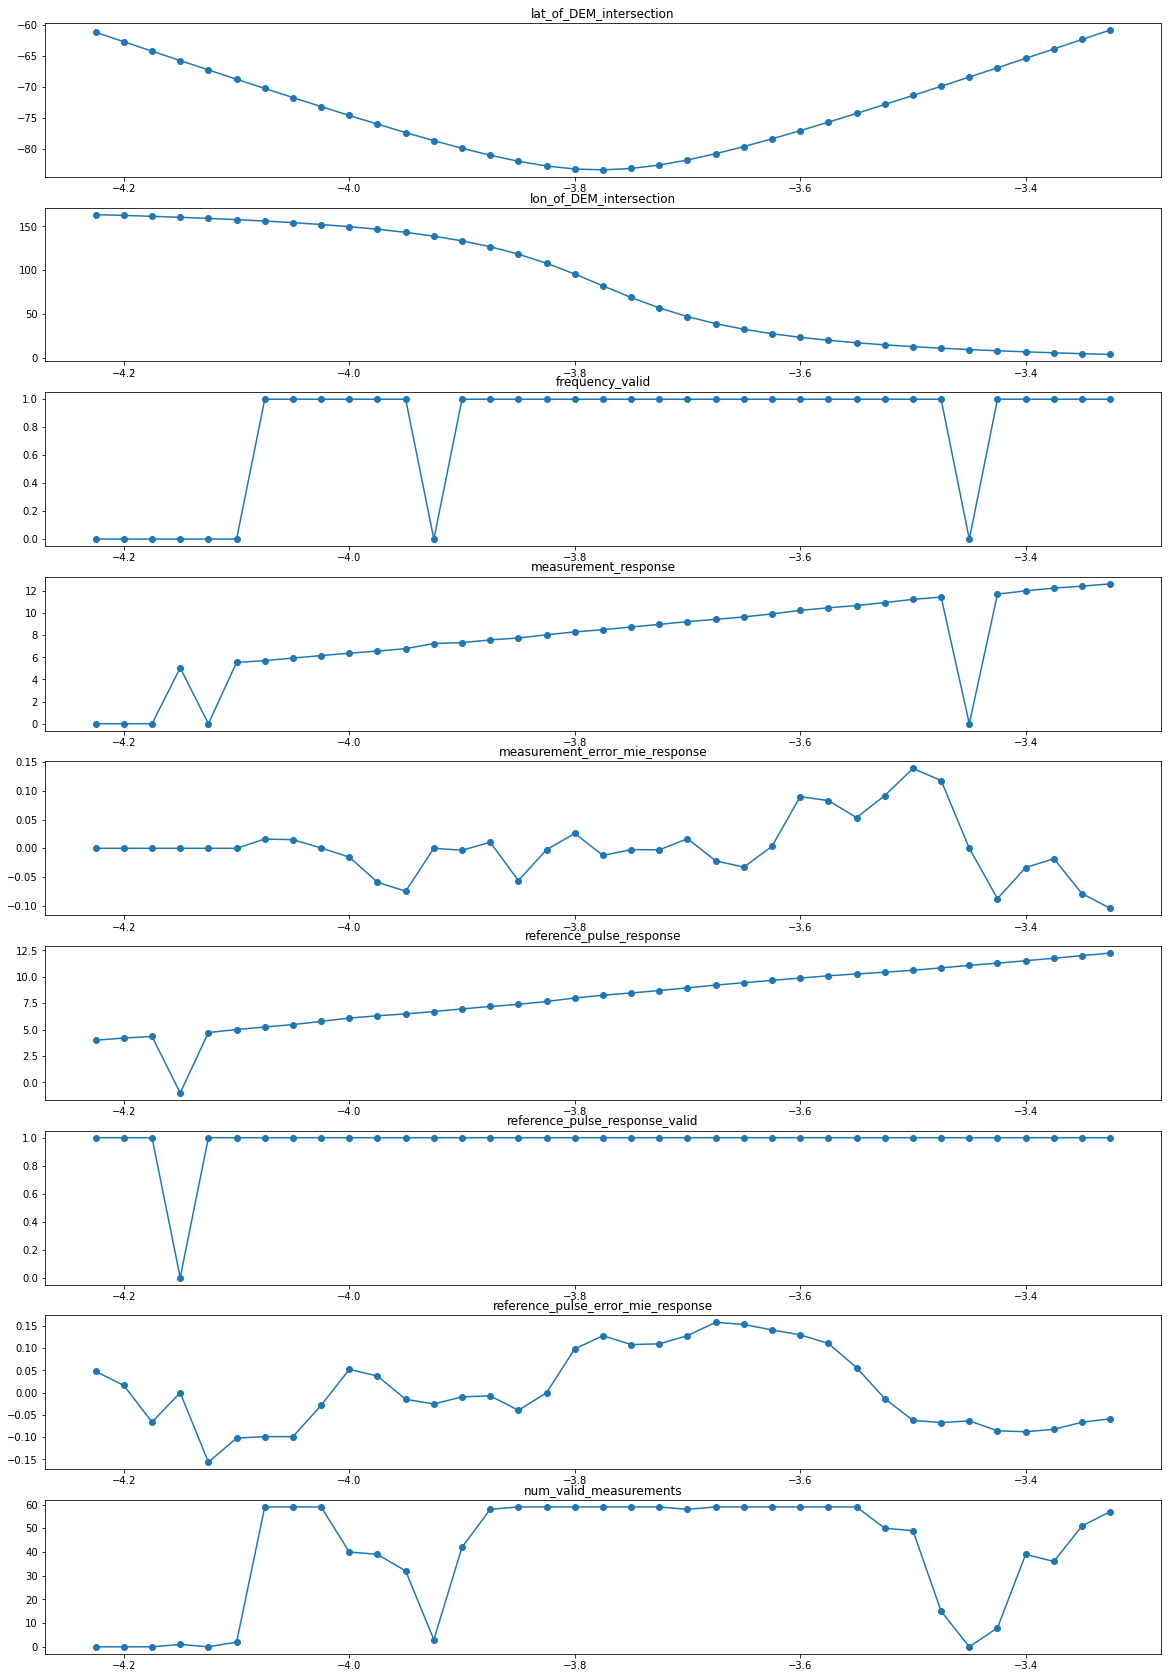

In [4]:

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,30)

pars = [
    "lat_of_DEM_intersection",
    "lon_of_DEM_intersection",
    "frequency_valid",
    "measurement_response",
    "measurement_error_mie_response",
    "reference_pulse_response",
    "reference_pulse_response_valid",
    "reference_pulse_error_mie_response",
    "num_valid_measurements",
]
fig, axs = plt.subplots(len(pars))

for idx, p in enumerate(pars):
    print(axs[idx])
    axs[idx].plot(
        ds.frequency_offset.values,
        ds[p].values
    )
    axs[idx].scatter(
        ds.frequency_offset.values,
        ds[p].values
    )
    axs[idx].set_title(p)
    
